In [ ]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

xls = pd.ExcelFile("./xlsx/Shrawan_2081_Publish-1.xlsx")

In [ ]:
dataframes = []

In [ ]:
for i, sheet_name in enumerate(xls.sheet_names):
    df = pd.read_excel(xls, sheet_name=sheet_name)
    dataframes.append(df)

In [ ]:
for index, dataframe in enumerate(dataframes, start=1):
    exec(f"data{index} = dataframe")

In [ ]:
data4 = data4.drop([0, 1, 3]).reset_index(drop=True)

In [ ]:
data4.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,"Class ""A""","Class ""B""","Class ""C""",Overall
1,NaN,1,Total Deposit/GDP,100.233875,10.495416,2.276881,113.006172
2,NaN,2,Total Credit/GDP,80.158952,8.75567,1.758098,90.67272
3,NaN,3,Total Credit/ Total Deposit**,79.971918,83.423749,77.215182,80.236962
4,NaN,4,CD Ratio*,78.452673,82.637898,76.435152,78.795452


In [ ]:
data4.drop(columns=["Unnamed: 0", "Unnamed: 1"], inplace=True)

In [ ]:
data4_1 = data4.iloc[:12]
data4_1.columns = data4_1.iloc[0]
data4_1 = data4_1.drop(0).reset_index(drop=True)
data4_1.iloc[:11]
data4_1.rename(columns={np.nan: "Credit, Deposit Ratios (%)"}, inplace=True)
data4_1

,"Credit, Deposit Ratios (%)","Class ""A""","Class ""B""","Class ""C""",Overall
0,Total Deposit/GDP,100.233875,10.495416,2.276881,113.006172
1,Total Credit/GDP,80.158952,8.75567,1.758098,90.67272
2,Total Credit/ Total Deposit**,79.971918,83.423749,77.215182,80.236962
3,CD Ratio*,78.452673,82.637898,76.435152,78.795452
4,Fixed Deposit/Total Deposit,56.414609,61.091105,71.351442,57.149889
5,Saving Deposit/Total Deposit,30.417116,29.857791,19.684768,30.148931
6,Current Deposit/Total Deposit,5.581678,1.658134,1.122866,5.127442
7,Call Deposit/Total Deposit,6.824658,7.352245,6.883305,6.874839
8,NPL/ Total Loan^,3.760149,3.618449,9.87163,3.864137
9,Total LLP /Total Loan,4.375915,3.881439,9.338323,4.424385


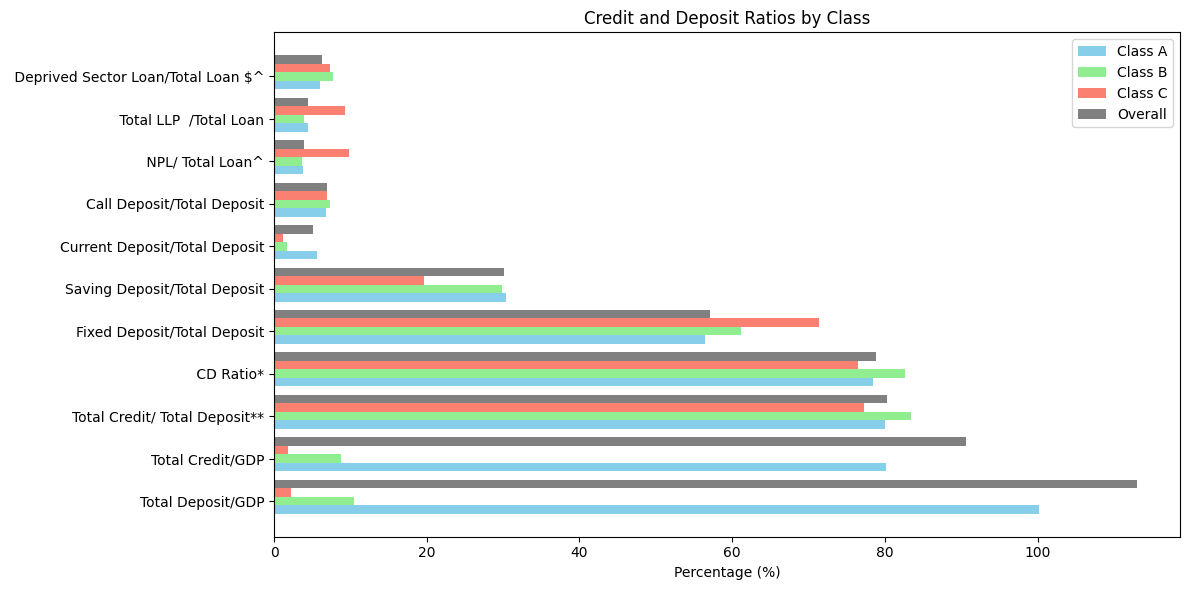

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data4_1' is a pandas DataFrame
# Extracting categories (first column) and the class values (Class A, B, C, Overall)
categories = data4_1.iloc[:, 0]  # First column for category labels
class_a_values = data4_1['Class "A"']
class_b_values = data4_1['Class "B"']
class_c_values = data4_1['Class "C"']
overall_values = data4_1["Overall"]

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
x_positions = np.arange(len(categories))

# Plotting bars for each class
ax.barh(
    x_positions - bar_width, class_a_values, bar_width, label="Class A", color="skyblue"
)
ax.barh(x_positions, class_b_values, bar_width, label="Class B", color="lightgreen")
ax.barh(
    x_positions + bar_width, class_c_values, bar_width, label="Class C", color="salmon"
)
ax.barh(
    x_positions + 2 * bar_width,
    overall_values,
    bar_width,
    label="Overall",
    color="gray",
)

# Adding labels and title
ax.set_yticks(x_positions)
ax.set_yticklabels(categories)
ax.set_xlabel("Percentage (%)")
ax.set_title("Credit and Deposit Ratios by Class")

# Adding legend
ax.legend()

plt.tight_layout()
plt.show()